In [39]:
from exaDBconn import genDBCursor
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
cur = genDBCursor()

In [31]:
taxSearches = "SELECT ANONIDDIM.ID, irsQuery.query, TIMEDIM.[month], TIMEDIM.[day of the month] FROM \
(SELECT QUERYDIM.QUERY as query, FACTS.ANONID as anonid, FACTS.TIMEID as timeid \
FROM FACTS \
JOIN QUERYDIM ON QUERYDIM.ID=FACTS.QUERYID \
WHERE QUERYDIM.QUERY LIKE '%1040%' \
OR QUERYDIM.QUERY LIKE '%tax forms%' \
OR QUERYDIM.QUERY LIKE '% irs %' \
OR QUERYDIM.QUERY LIKE 'irs %' \
OR QUERYDIM.QUERY LIKE '%tax%') as irsQuery \
JOIN ANONIDDIM on irsQuery.anonid=ANONIDDIM.ANONID \
JOIN TIMEDIM on TIMEDIM.ID=irsQuery.timeid;"

df = cur.export_to_pandas(taxSearches)




In [32]:
df.dtypes

ID                   int64
QUERY               object
month               object
day of the month     int64
dtype: object

In [23]:
len(df.ID.unique())  #number of unique Users

733

In [37]:
dfgrpd = df.groupby(['month','day of the month']).size()
print(dfgrpd)

month      day of the month
april      1                   22
           2                   56
           3                   32
           4                   21
           5                   27
                               ..
may        27                   3
           28                  11
           29                  28
           30                  35
           31                  17
Length: 92, dtype: int64


In [57]:
print(dfgrpd.values)

[22 56 32 21 27 37 20 32 66 22 27 30 20 30 59 63 95 27  6 14 13 23 27 18
 10  7  3  7  7  5 50 44 18 30 33 39 33 45 44 54 59 50 48 41 47 35 36 43
 48 34 35 47 29 20 29 34 49 35 37 10 19 11  6 22 16 10 13 30 30 11 16 19
  9 10 10 10  9  1 25 12 13 34 12 18 10  8 17  3 11 28 35 17]


In [55]:
dates = []
for i in dfgrpd.keys():
    dates.append(i[0].strip()+str(i[1]))

<BarContainer object of 92 artists>

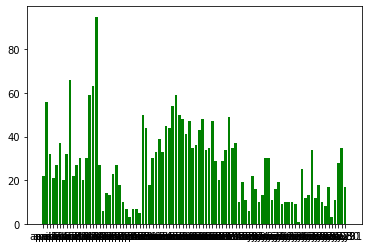

In [56]:
plt.bar(dates,dfgrpd.values,color='green')